In [186]:
%pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [187]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# set Thai font
mpl.font_manager.fontManager.addfont('./assets/thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [188]:
# Read data from CSV file
data = pd.read_csv("ratchakitcha.csv")

# remove all rows with empty title
data = data[~data['เรื่อง'].isnull()]

print(data.count())

วันที่     15364
เรื่อง     15364
เล่ม       15364
ตอน        15364
ประเภท     15364
หน้า       15364
เล่มที่       66
URL        15364
id         15364
dtype: int64


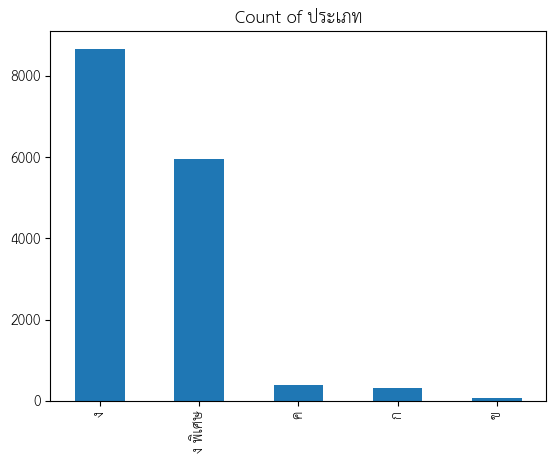

In [189]:
category_counts = data['ประเภท'].value_counts()

category_counts.plot(kind='bar')
plt.title('Count of ประเภท')
plt.show()

ประกาศเจ้าพนักงานพิทักษ์ทรัพย์                          8543
ประกาศสำนักนายกรัฐมนตรี                                  342
ประกาศสำนักงานทะเบียนหุ้นส่วนบริษัทกลาง                  285
ประกาศกระทรวงอุตสาหกรรม                                  203
ประกาศศาลเยาวชนและครอบครัวกลาง                           184
ประกาศนายทะเบียนมูลนิธิกรุงเทพมหานคร                     179
ประกาศนายทะเบียนสมาคมกรุงเทพมหานคร                       172
ประกาศสำนักงานพระพุทธศาสนาแห่งชาติ                       152
ประกาศกระทรวงการคลัง                                     119
ประกาศนายทะเบียนพรรคการเมือง                             107
ประกาศธนาคารออมสิน                                       103
ประกาศกระทรวงมหาดไทย                                      97
ประกาศสภาผู้แทนราษฎร                                      86
ประกาศนายทะเบียนมูลนิธิจังหวัดเชียงใหม่                   83
กระทู้ถามของสมาชิกสภาผู้แทนราษฎร                          75
ประกาศสำนักงานที่ดินกรุงเทพมหานคร                         71
ประกาศกระทรวงเกษตรและสหก

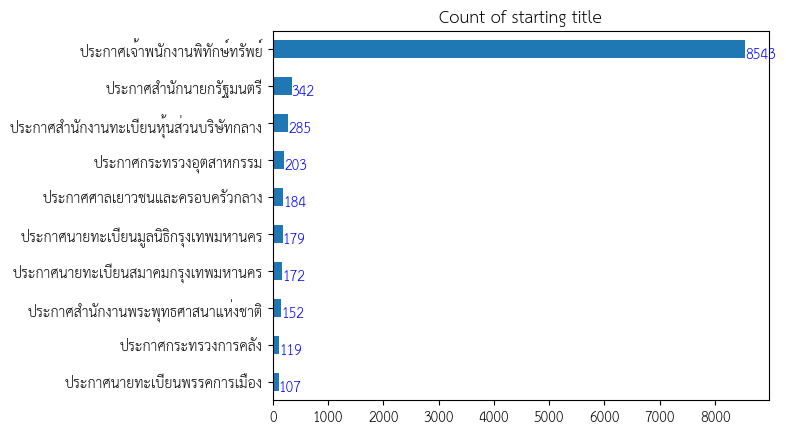

In [190]:
start_with_counts = data['เรื่อง'].str.split().str[0].value_counts()

print(start_with_counts.head(50))

top20 = start_with_counts.head(10)

ax = top20.plot(kind='barh')
for i, v in enumerate(top20): ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Count of starting title')
plt.gca().invert_yaxis()
plt.show()

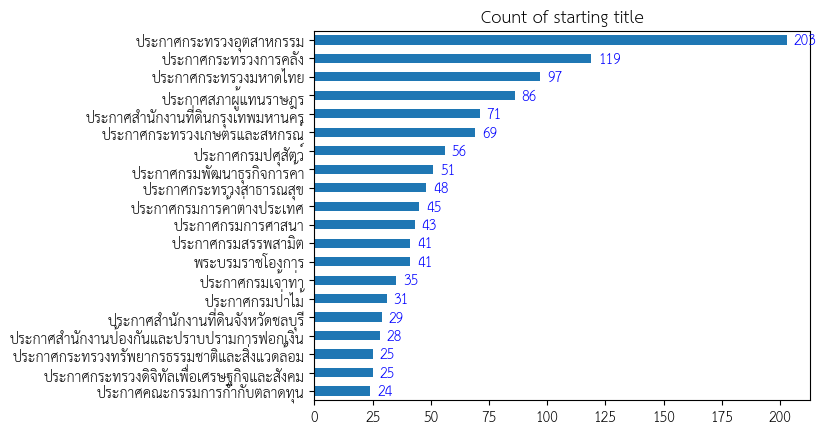

In [191]:
# filter all title start with any in the list
with open('filter.json', 'r', encoding='utf-8') as file:
    filter_startwiths = json.load(file)['filter_startwiths']

filtered_data = data[data['เรื่อง'].apply(lambda x: not any(x.startswith(s) for s in filter_startwiths))]

title_count_filtered_data = filtered_data['เรื่อง'].str.split().str[0].value_counts()

top20 = title_count_filtered_data.head(20)
ax = top20.plot(kind='barh')
for i, v in enumerate(top20): ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title('Count of starting title')
plt.gca().invert_yaxis()
plt.show()